# Solving Heat Equation

Here we solve $\frac{\partial^{2}}{ \partial^{2} x} u(x,y)
    +\frac{\partial^{2}}{ \partial^{2} y} u(x,y) =0.$
The boundary conditions for $0 \leq x \leq L_{x}$ and  $0 \leq y \leq L_{y}$ read $u(0,y)=u(L_{x},y)=u(x,0)=t_{1}$ and $u(x,L_{y})=t_{m} \sin(\pi x)$.

In [1]:
import time
import torch

from scipy.stats import qmc
import numpy as np

from  src_nna.pinns.nn_pinns import MLP_PINN
from src_nna.pinns.heat_eq import heat_eq_2d
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt

Here we experiment with teh complexity of the model by varying number of hidden layers and hidden units.

# hidden layers: 4
#units in hidden layers: 8
start training: 


  1%|          | 582/50001 [00:02<03:29, 235.91it/s]


early stopping
computation time: 2.8402


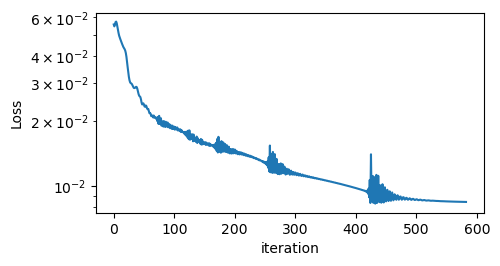

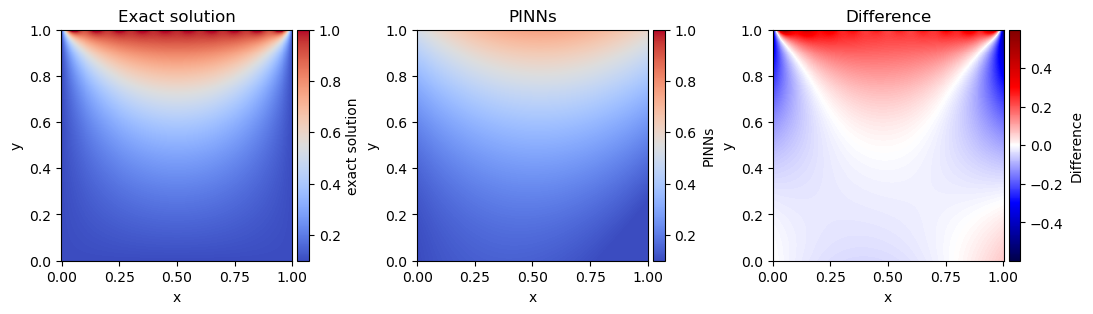

# hidden layers: 4
#units in hidden layers: 16
start training: 


  3%|▎         | 1354/50001 [00:07<04:15, 190.13it/s]


early stopping
computation time: 7.1245


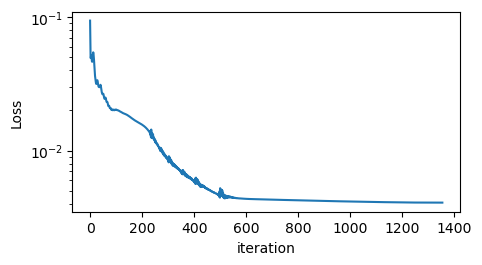

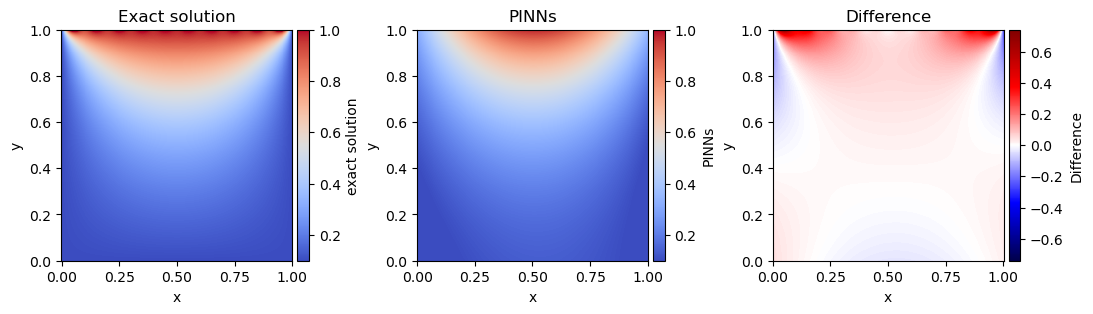

# hidden layers: 4
#units in hidden layers: 32
start training: 


  2%|▏         | 809/50001 [00:05<05:09, 158.89it/s]


early stopping
computation time: 5.0938


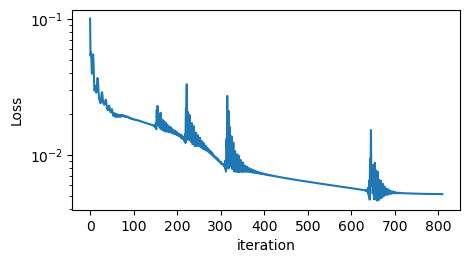

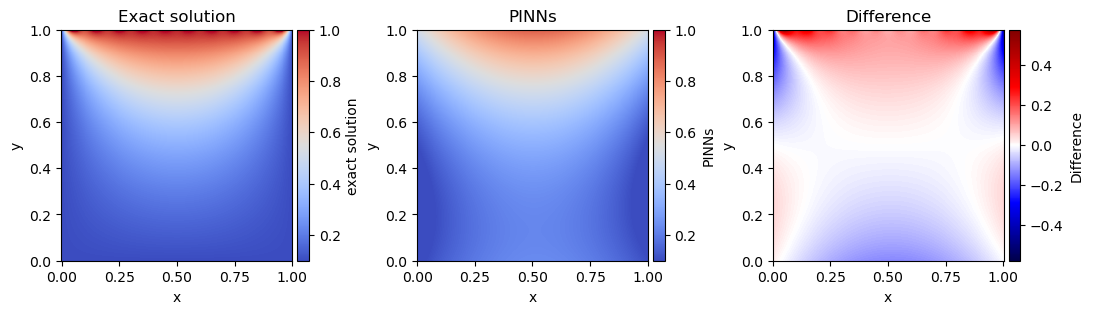

# hidden layers: 4
#units in hidden layers: 64
start training: 


  1%|▏         | 665/50001 [00:07<08:48, 93.27it/s]


early stopping
computation time: 7.1317


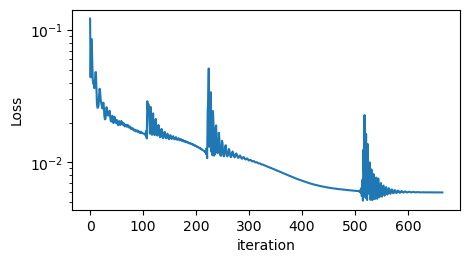

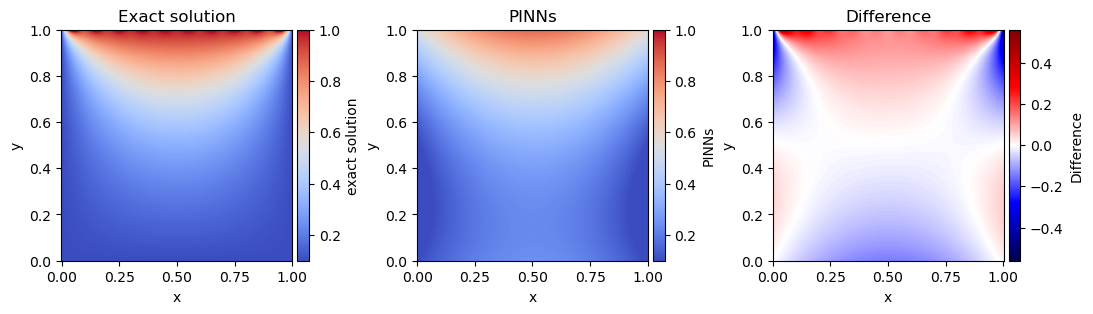

# hidden layers: 8
#units in hidden layers: 8
start training: 


  2%|▏         | 971/50001 [00:07<06:04, 134.62it/s]

early stopping
computation time: 7.2152


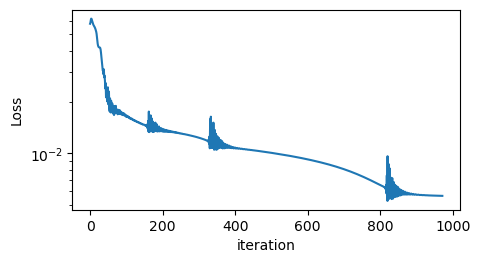

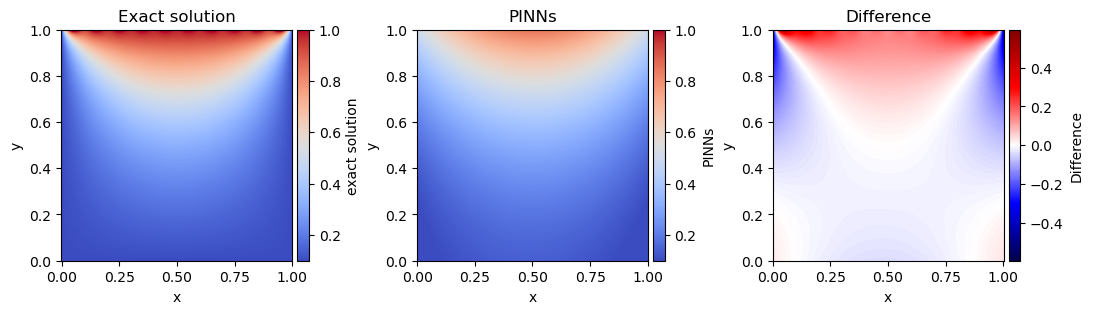

# hidden layers: 8
#units in hidden layers: 16
start training: 


  2%|▏         | 783/50001 [00:06<07:19, 111.87it/s]


early stopping
computation time: 7.0015


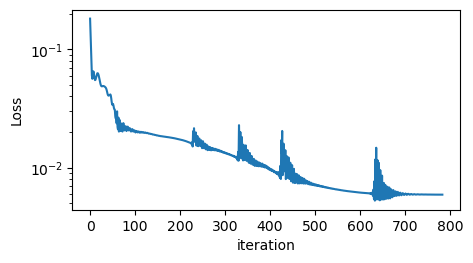

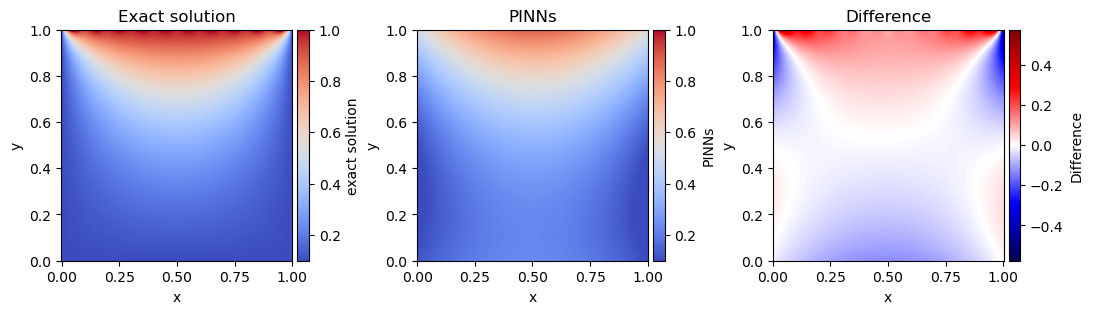

# hidden layers: 8
#units in hidden layers: 32
start training: 


  1%|▏         | 688/50001 [00:07<09:03, 90.76it/s]


early stopping
computation time: 7.5826


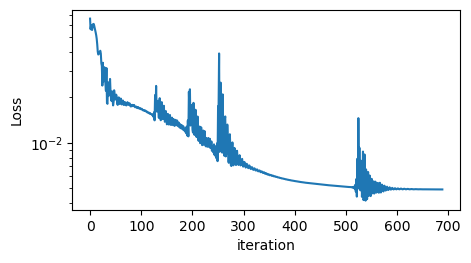

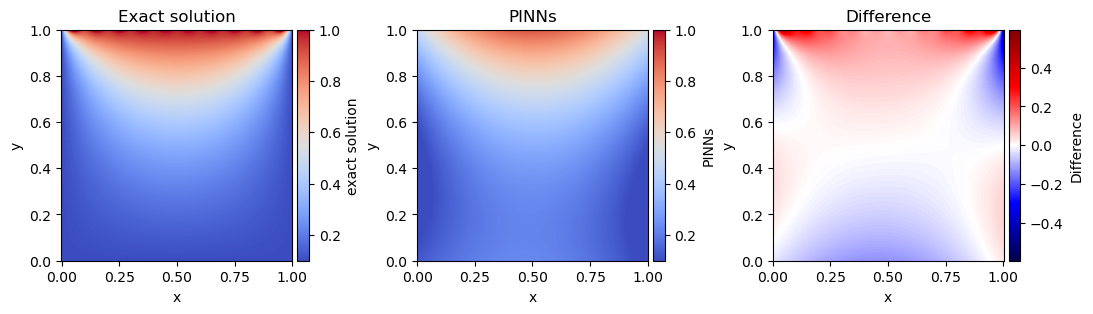

# hidden layers: 8
#units in hidden layers: 64
start training: 


  2%|▏         | 1144/50001 [00:25<17:49, 45.68it/s]


early stopping
computation time: 25.0443


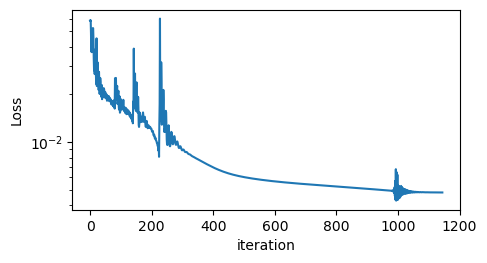

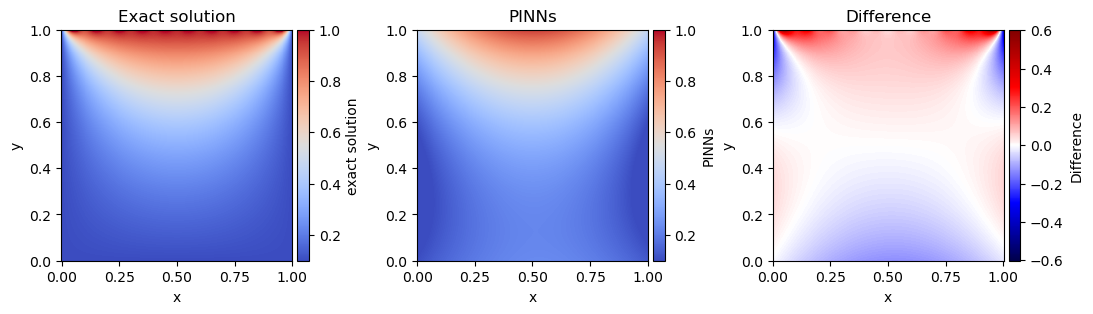

# hidden layers: 12
#units in hidden layers: 8
start training: 


 41%|████      | 20499/50001 [04:12<06:03, 81.16it/s]


early stopping
computation time: 252.6001


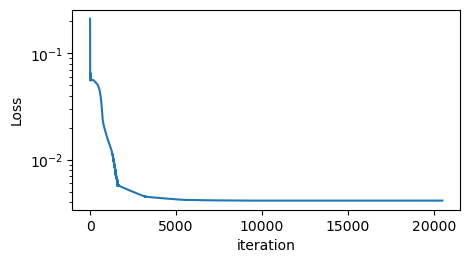

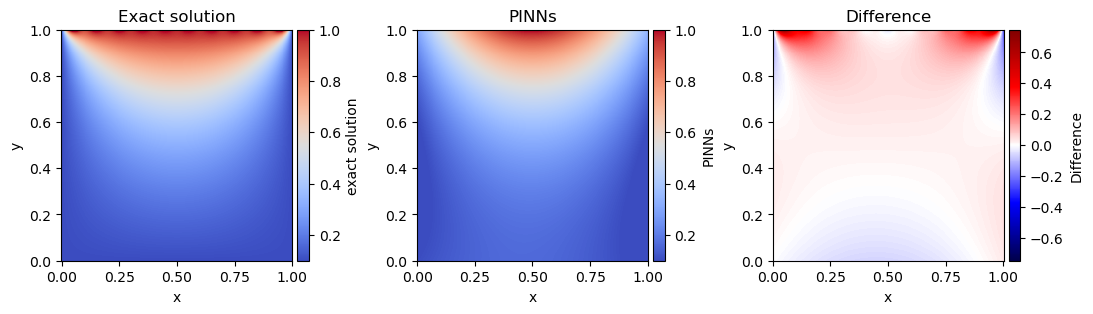

# hidden layers: 12
#units in hidden layers: 16
start training: 


  4%|▍         | 2080/50001 [00:34<13:15, 60.25it/s]

early stopping
computation time: 34.5252


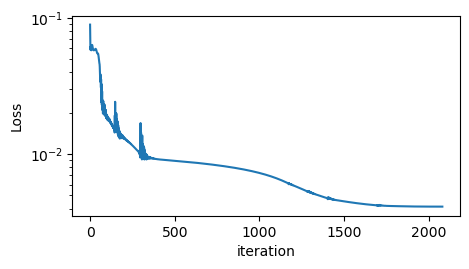

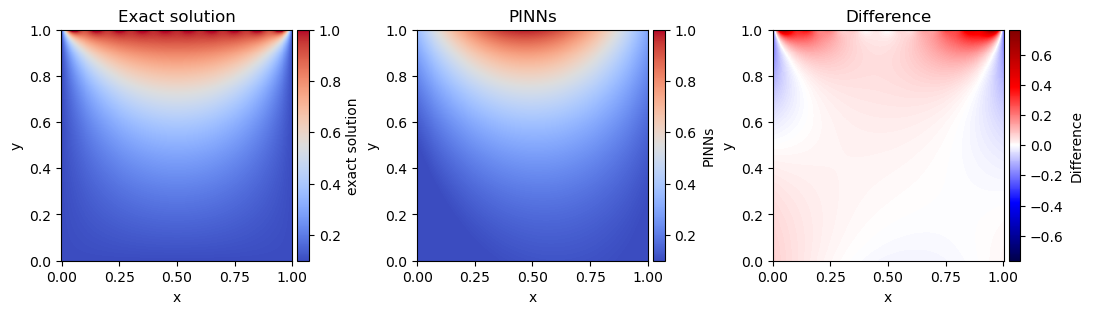

# hidden layers: 12
#units in hidden layers: 32
start training: 


  1%|▏         | 700/50001 [00:13<16:03, 51.17it/s]


early stopping
computation time: 13.6828


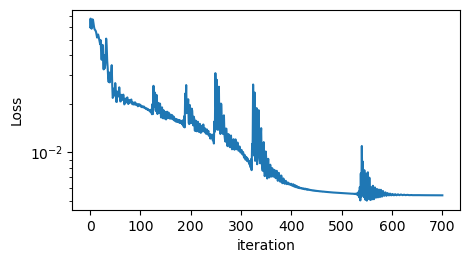

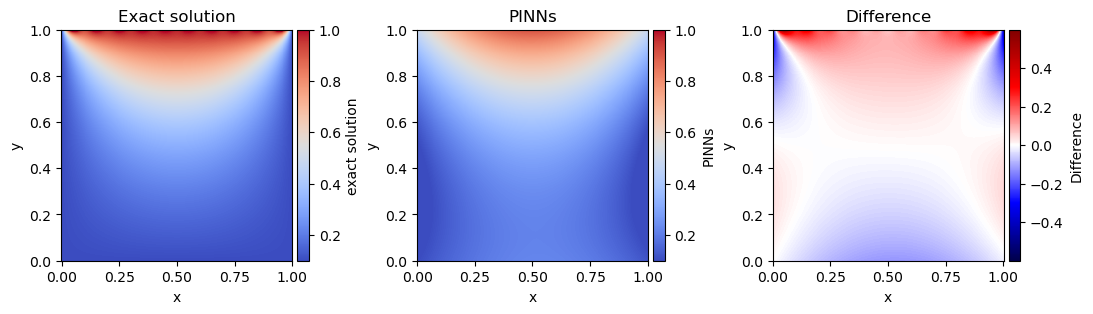

# hidden layers: 12
#units in hidden layers: 64
start training: 


100%|██████████| 50001/50001 [35:19<00:00, 23.59it/s]


computation time: 2119.6510


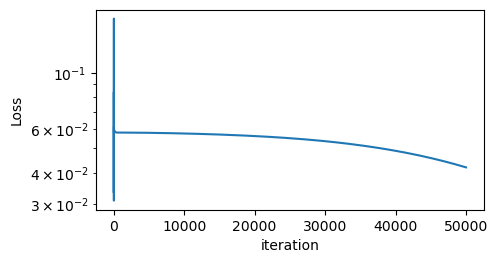

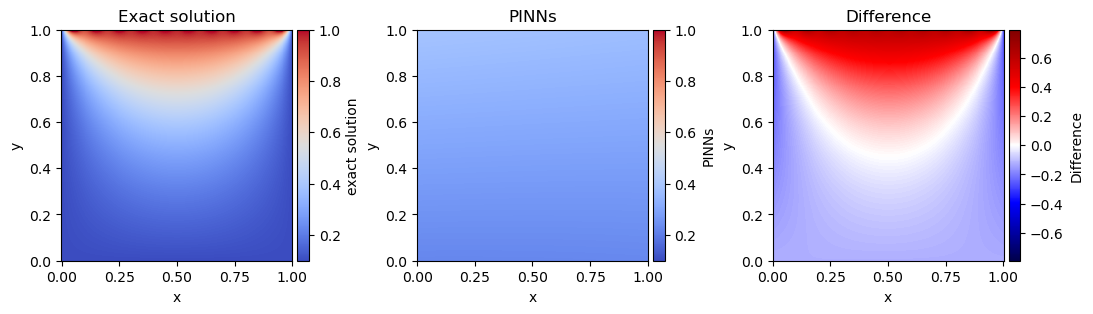

# hidden layers: 16
#units in hidden layers: 8
start training: 


  1%|          | 267/50001 [00:05<18:19, 45.25it/s]


early stopping
computation time: 5.9060


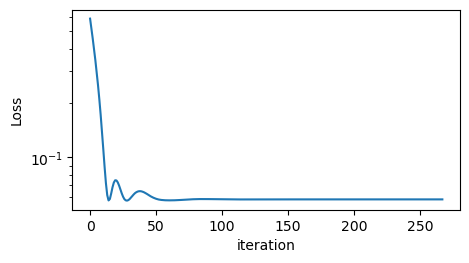

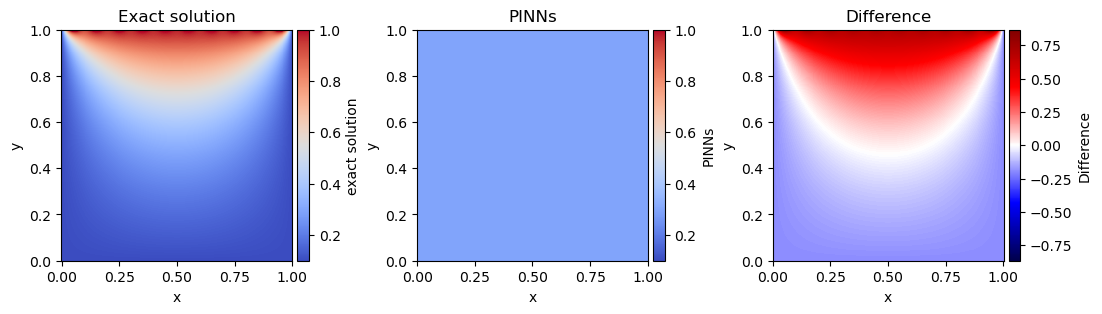

# hidden layers: 16
#units in hidden layers: 16
start training: 


  1%|▏         | 708/50001 [00:21<25:14, 32.56it/s]


early stopping
computation time: 21.8365


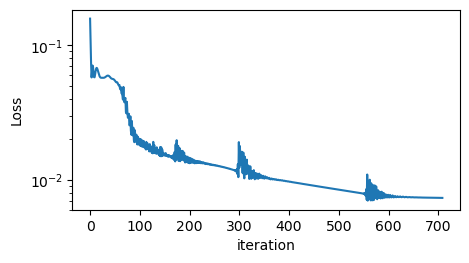

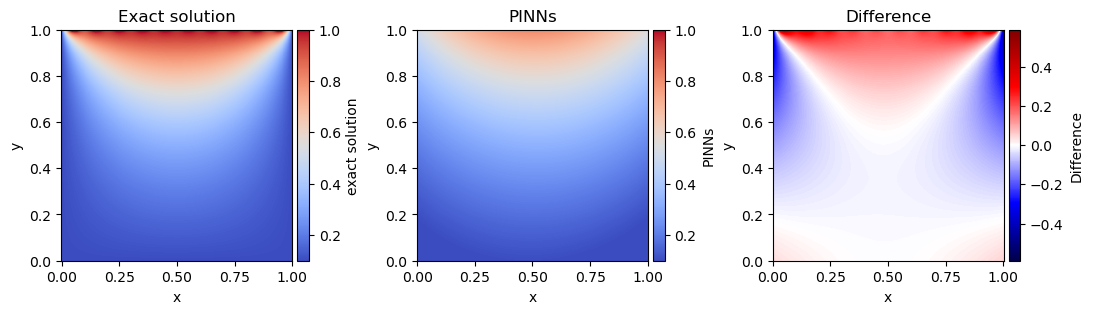

# hidden layers: 16
#units in hidden layers: 32
start training: 


  4%|▎         | 1867/50001 [01:21<34:58, 22.94it/s] 


early stopping
computation time: 81.4137


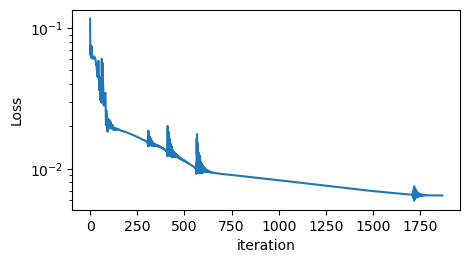

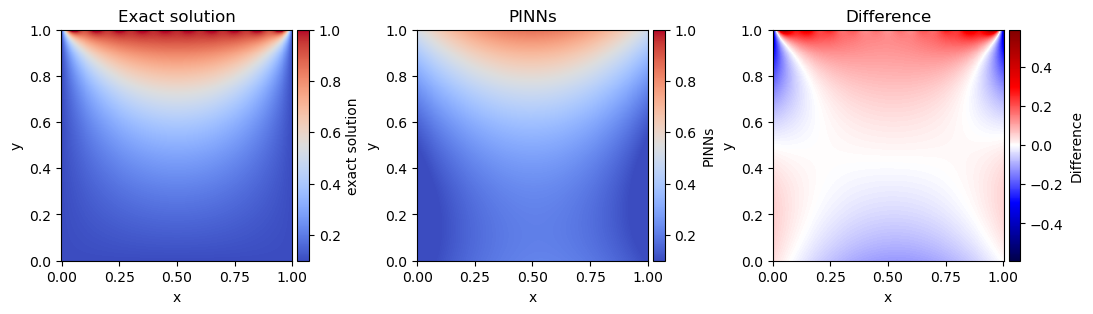

# hidden layers: 16
#units in hidden layers: 64
start training: 


  3%|▎         | 1441/50001 [01:46<59:33, 13.59it/s]  

early stopping
computation time: 106.0348


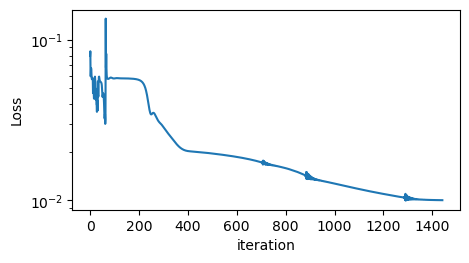

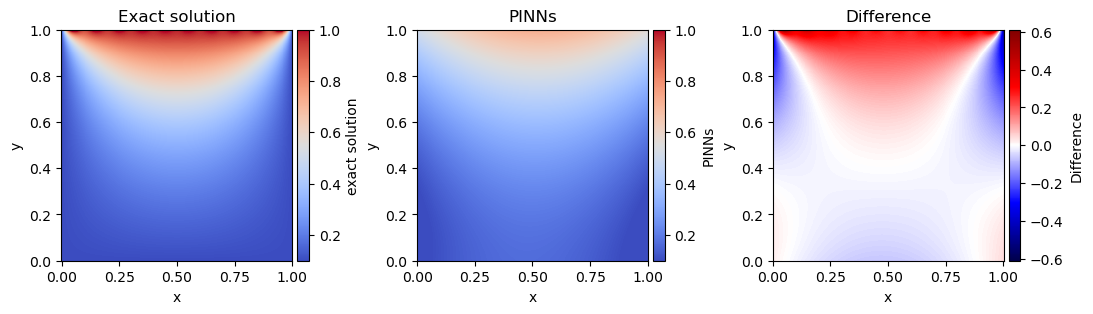

In [2]:
plotting = True
n_bc = 4
n_data_per_bc = 1000
Lx=1.0
Ly=1.0 
alpha = 0.5 #0.5
Nc = 600 
n = 700

t1=0.1
tm=1.0

lear_rate=  5e-3 #5e-3
num_iteration = 50000


for num_layers in [4, 8, 12, 16]:
    for j in range(4):
        num_hidden = np.power(2, 3+j)
        print("# hidden layers:", num_layers)
        print("#units in hidden layers:", num_hidden)

        heat_eq_2d. run_training( Lx, Ly, t1, tm, n_bc, n_data_per_bc,
                      Nc,lear_rate, num_iteration,
                        n, num_hidden, num_layers,  plotting =False)


In the following, we check the role of $t_{1}$ and $t_{m}$ parameters in the performance of the PINNs. 

t1: 0.1 tm: 0.5
start training: 


  2%|▏         | 783/50001 [00:18<19:33, 41.96it/s]


early stopping
computation time: 18.6688


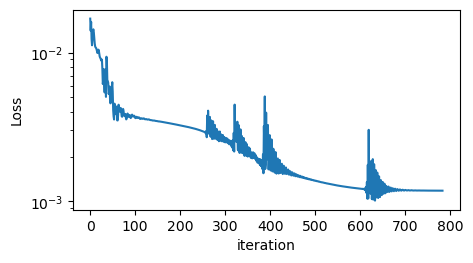

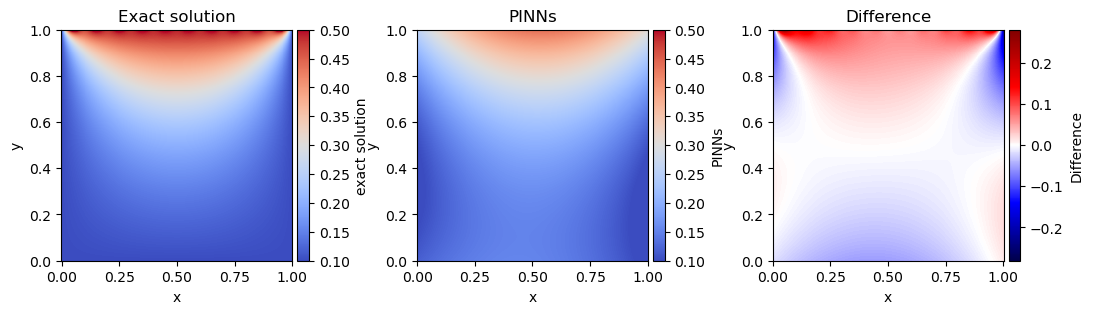

t1: 0.3 tm: 0.5
start training: 


  1%|          | 254/50001 [00:05<17:24, 47.63it/s]


early stopping
computation time: 5.3362


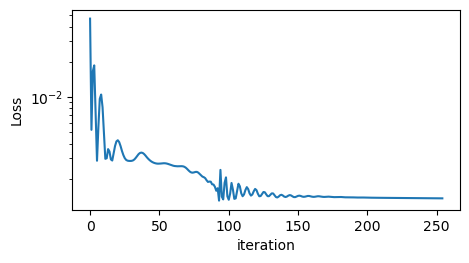

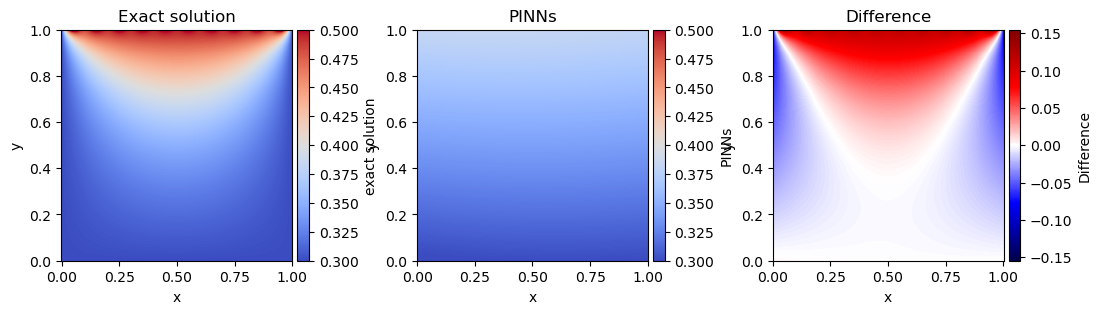

t1: 0.1 tm: 1.0
start training: 


  2%|▏         | 1163/50001 [00:28<20:14, 40.22it/s]

early stopping
computation time: 28.9229


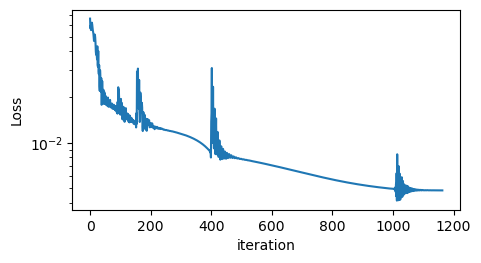

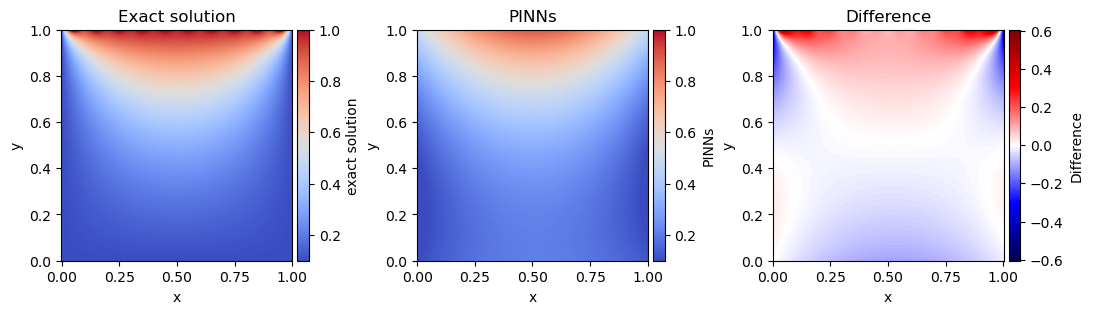

t1: 0.3 tm: 1.0
start training: 


100%|██████████| 50001/50001 [21:30<00:00, 38.75it/s]


computation time: 1290.4205


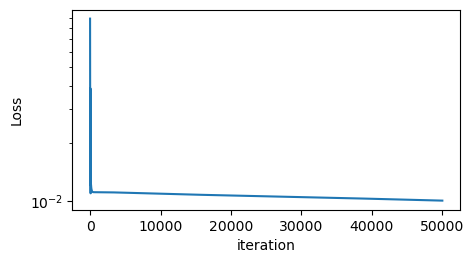

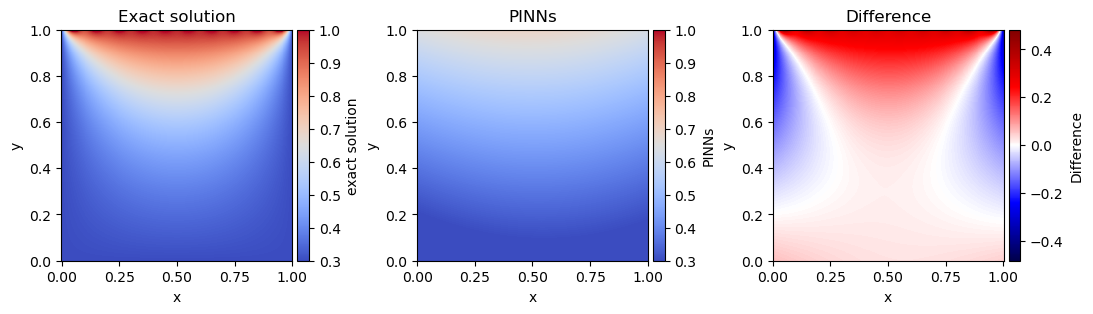

In [5]:
plotting = True
n_bc = 4
n_data_per_bc = 1000
Lx=1.0
Ly=1.0 
Nc = 700 
n = 700

t1=0.1
tm=1.0

lear_rate=  5e-3 
num_iteration = 50000

num_layers = 12
num_hidden = 32

for tm in [0.5, 1.0]:
    for t1 in [0.1, 0.3]:
        print("t1:", t1, "tm:", tm)

        heat_eq_2d. run_training( Lx, Ly, t1, tm, n_bc, n_data_per_bc,
                      Nc,lear_rate, num_iteration,
                        n, num_hidden, num_layers,  plotting =False)
